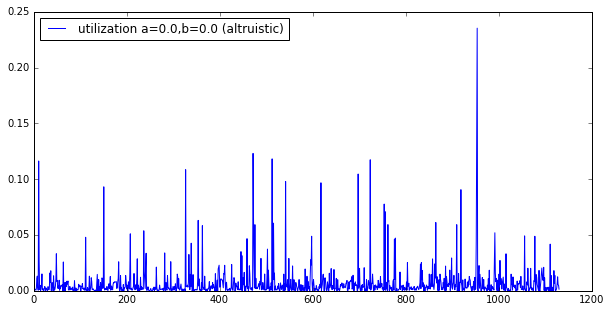

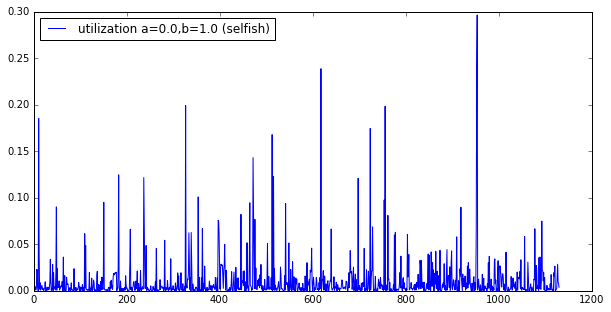

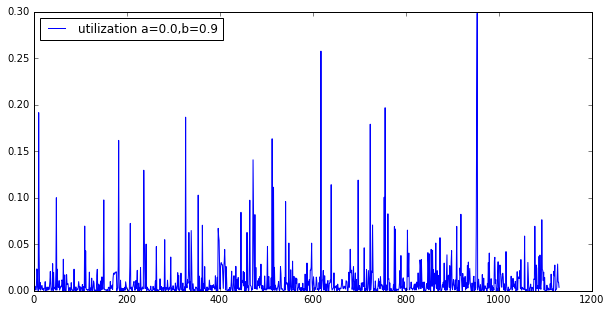

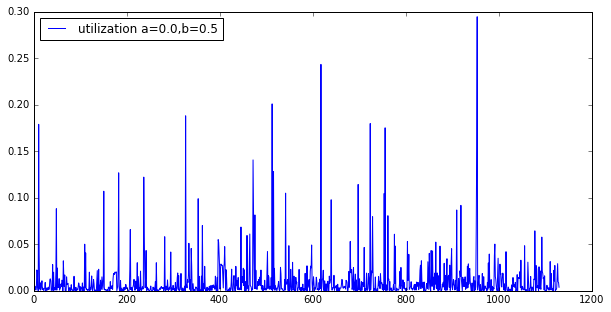

Mean utilization for a=0.0,b=0.0 (altruistic) is 0.00706583054359
Mean utilization for a=0.0,b=1.0 (selfish) is 0.010677989328
Mean utilization for a=0.0,b=0.9 is 0.0109012591884
Mean utilization for a=0.0,b=0.5 is 0.0106272762676


In [3]:
%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import mean, median, variance 
plt.rcParams['figure.figsize'] = [10, 5]
import pprint

def get_data_from_file(file_name):
    utilizations = []
    line_no = 0
        
    with open(file_name, 'r') as results:
        for line in results:
            line = line.split(",")
            line[len(line)-1] = line[len(line)-1].replace('\r', '').replace('\n', '')
            line_no = line_no + 1
            if line_no == 1:
                edges = line
            else: 
                utilizations.append([float(u) for u in line[1:]])   
    
    edges_data = {}
    for i in range(len(edges)):
        utilizations_of_edge = []
        for utilization in utilizations:
            utilizations_of_edge.append(utilization[i])
        edges_data[edges[i]] = utilizations_of_edge
    
    return edges_data

utilization_altruistic = get_data_from_file("results/edges_a0_b0.csv")
utilization_selfish = get_data_from_file("results/edges_a0_b1.csv")
utilization_a0_b09 = get_data_from_file("results/edges_a0_b0.9.csv")
utilization_a0_b05 = get_data_from_file("results/edges_a0_b0.5.csv")

utilization_altruistic_means = {}
utilization_selfish_means = {}
utilization_a0_b09_means = {}
utilization_a0_b05_means = {}

for key, value in utilization_altruistic.iteritems():
    utilization_altruistic_means[key] = mean(value)
    
for key, value in utilization_selfish.iteritems():
    utilization_selfish_means[key] = mean(value)

for key, value in utilization_a0_b09.iteritems():
    utilization_a0_b09_means[key] = mean(value)

for key, value in utilization_a0_b05.iteritems():
    utilization_a0_b05_means[key] = mean(value)

# pp = pprint.PrettyPrinter(depth=4)
# pp.pprint(utilization_altruistic_means)

plt.plot(utilization_altruistic_means.values(), label="utilization a=0.0,b=0.0 (altruistic)")
plt.legend(loc='best')
plt.show()

plt.plot(utilization_selfish_means.values(), label="utilization a=0.0,b=1.0 (selfish)")
plt.legend(loc='best')
plt.show()

plt.plot(utilization_a0_b09_means.values(), label="utilization a=0.0,b=0.9")
plt.legend(loc='best')
plt.show()

plt.plot(utilization_a0_b05_means.values(), label="utilization a=0.0,b=0.5")
plt.legend(loc='best')
plt.show()

print "Mean utilization for a=0.0,b=0.0 (altruistic) is " + str(mean(utilization_altruistic_means.values()))
print "Mean utilization for a=0.0,b=1.0 (selfish) is " + str(mean(utilization_selfish_means.values()))
print "Mean utilization for a=0.0,b=0.9 is " + str(mean(utilization_a0_b09_means.values()))
print "Mean utilization for a=0.0,b=0.5 is " + str(mean(utilization_a0_b05_means.values()))